### This script contains the following points:
Note: Corresponding steps for exercise task shown as (Step x)

#### 1. (Step 1) Importing libraries, defining project path, and importing "orders_products_all.pkl"
#### 2. (Step 2) A note about PII
#### 3. (Step 3a) Creating column "region"
#### 4. (Step 3b) Analyzing spending habits between regions
#### 5. (Step 4a) Creating column for exclusion flag "low_activity?" (to identify low activity customers)
#### 6. (Step 4b) Exporting file as "orders_products_all_flagged.pkl"

## 1. (Step 1) Importing Libraries, Defining Project Path, and Importing Datasets

In [1]:
# Import libraries

import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
# Set path
path = r'C:\Users\prena\03-2023 Instacart Basket Analysis'

In [3]:
# Importing orders_products_all.pkl dataset
ords_prods_all = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'orders_products_all.pkl'))

In [4]:
ords_prods_all.shape

(32399732, 33)

In [5]:
# Set display to max columns for when we want to review the head() or tail()
pd.set_option('display.max_columns', None)

In [6]:
# Checking ords_prods_all to see all column names (for reference)
ords_prods_all.head()

,order_id,user_id,order_number,order_day_of_week,order_hour_of_day,days_since_last_order,product_id,add_to_cart_order,reordered,_merge,product_name,aisle_id,department_id,prices,_merge_2,price_range_loc,busiest_day,busiest_days,busiest_period_of_day,max_order,loyalty_flag,avg_price,spend_flag,median_days_since_last_order,order_freq_flag,gender,state,age,date_joined,dependants_count,fam_status,income,_merge_3
0,2539329,1,1,2,8,NaN,196,1,0,both,Soda,77,7,9.0,both,Mid-range product,Regularly busy,Regularly busy,Average orders,10,New customer,6.367188,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,both
1,2398795,1,2,3,7,15.0,196,1,1,both,Soda,77,7,9.0,both,Mid-range product,Regularly busy,Least busy,Average orders,10,New customer,6.367188,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,both
2,473747,1,3,3,12,21.0,196,1,1,both,Soda,77,7,9.0,both,Mid-range product,Regularly busy,Least busy,Most orders,10,New customer,6.367188,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,both
3,2254736,1,4,4,7,29.0,196,1,1,both,Soda,77,7,9.0,both,Mid-range product,Least busy,Least busy,Average orders,10,New customer,6.367188,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,both
4,431534,1,5,4,15,28.0,196,1,1,both,Soda,77,7,9.0,both,Mid-range product,Least busy,Least busy,Most orders,10,New customer,6.367188,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,both


## 2. (Step 2) Consider security implications
PII data was removed from the customer data set during wrangling and consistency check step (see script 4.9 Part 1a, step 4b).

## 3. (Step 3a) Create "region" column

In [7]:
# Creating region "Northeast"
ords_prods_all.loc[ords_prods_all['state'].isin(['Maine','New Hampshire','Vermont','Massachusetts','Rhode Island','Connecticut', 'New York','Pennsylvania','New Jersey']), 'region'] = "Northeast"

In [8]:
# Creating region "Midwest"
ords_prods_all.loc[ords_prods_all['state'].isin(['Wisconsin','Michigan','Illinois','Indiana','Ohio', 'North Dakota', 'South Dakota', 'Nebraska', 'Kansas', 'Minnesota', 'Iowa', 'Missouri']), 'region'] = "Midwest"

In [9]:
# Creating region "South"
ords_prods_all.loc[ords_prods_all['state'].isin(['Delaware', 'Maryland', 'District of Columbia', 'Virginia', 'West Virginia', 'North Carolina', 'South Carolina', 'Georgia', 'Florida', 'Kentucky', 'Tennessee', 'Mississippi', 'Alabama', 'Oklahoma', 'Texas', 'Arkansas', 'Louisiana']), 'region'] = "South"

In [10]:
# Creating region "West"
ords_prods_all.loc[ords_prods_all['state'].isin(['Idaho', 'Montana', 'Wyoming', 'Nevada', 'Utah', 'Colorado', 'Arizona', 'New Mexico', 'Alaska', 'Washington', 'Oregon', 'California', 'Hawaii']), 'region'] = "West"

In [11]:
# Frequency count for new column 'region'
ords_prods_all['region'].value_counts(dropna = False)

South        10790096
West          8291679
Midwest       7596065
Northeast     5721892
Name: region, dtype: int64

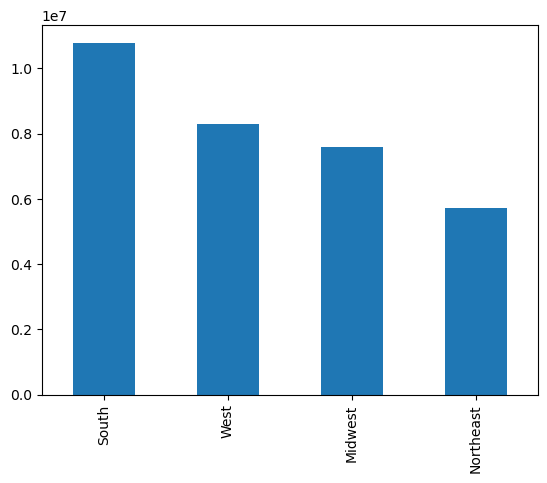

In [12]:
bar_region = ords_prods_all['region'].value_counts(dropna = False).plot.bar()

In [13]:
# Export bar chart into project folder
bar_region.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_region.png'))

## 4. (Step 3b) Analyzing spending habits between U.S regions

In [14]:
ct_region_day = pd.crosstab(ords_prods_all['region'], ords_prods_all['order_day_of_week'], dropna = False)

In [15]:
ct_region_day

order_day_of_week,0,1,2,3,4,5,6
region,,,,,,,
Midwest,1459973,1320548,991592,894942,887984,983066,1057960
Northeast,1097110,999814,746040,679186,666222,746336,787184
South,2052471,1891699,1404407,1287100,1258322,1399512,1496585
West,1593775,1447237,1071066,978637,970644,1076162,1154158


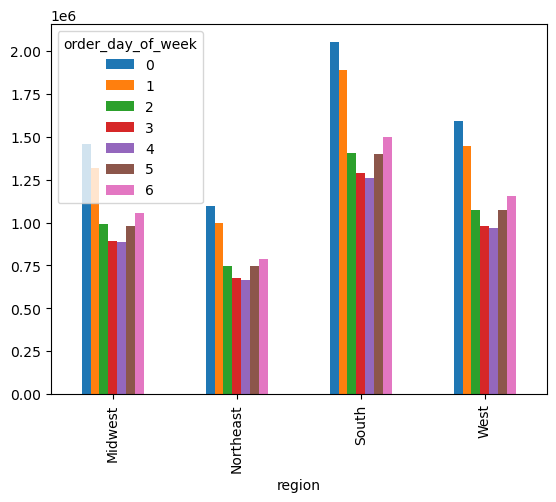

In [16]:
bar_region_day = ct_region_day.plot.bar()

In [17]:
# Export bar chart into project folder
bar_region_day.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_region_day.png'))

In [18]:
ct_region_hour = pd.crosstab(ords_prods_all['order_hour_of_day'], ords_prods_all['region'], dropna = False)

In [19]:
ct_region_hour

region,Midwest,Northeast,South,West
order_hour_of_day,,,,
0,50743,38552,73289,56158
1,27357,21541,37905,28880
2,16984,12433,21975,17968
3,11905,9216,17434,12713
4,12688,9506,17961,13077
5,19857,15393,30831,21863
6,67283,50539,98679,73949
7,208233,158932,297695,226063
8,398085,305303,578943,435532


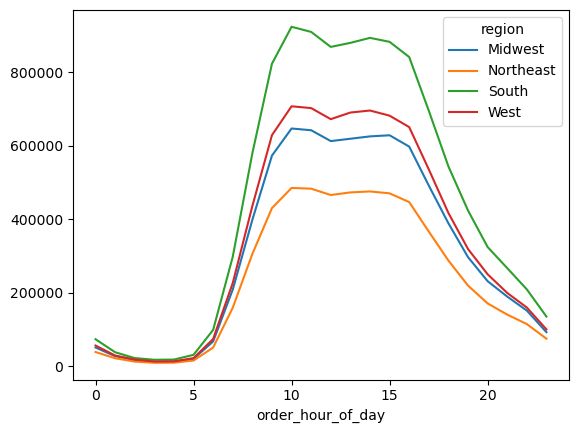

In [20]:
line_region_hour = ct_region_hour.plot.line()

In [21]:
# Export line chart into project folder
line_region_hour.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'line_region_hour.png'))

## 5. (Step 4a) Exclusion flag for low-activity customers

In [22]:
# Create new column ("low_activity?") that will contain Y to indicate low-activity, and N to indicate the opposite
result = []

for value in ords_prods_all["max_order"]:
    if value < 5:
        result.append("Y")
    else:
        result.append("N")

In [23]:
# Create new column called 'low_activity?' within ords_prods_all dataframe and set it equal to result
ords_prods_all['low_activity?'] = result

In [24]:
# Check frequency of column 'low_activity?'
ords_prods_all['low_activity?'].value_counts(dropna = False)

N    30959687
Y     1440045
Name: low_activity?, dtype: int64

In [25]:
ords_prods_all_flagged = ords_prods_all[ords_prods_all['low_activity?'] == 'N']

In [26]:
ords_prods_all_flagged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30959687 entries, 0 to 32399727
Data columns (total 35 columns):
 #   Column                        Dtype   
---  ------                        -----   
 0   order_id                      int32   
 1   user_id                       int32   
 2   order_number                  int8    
 3   order_day_of_week             int8    
 4   order_hour_of_day             int8    
 5   days_since_last_order         float16 
 6   product_id                    int32   
 7   add_to_cart_order             int32   
 8   reordered                     int8    
 9   _merge                        category
 10  product_name                  object  
 11  aisle_id                      int8    
 12  department_id                 int8    
 13  prices                        float16 
 14  _merge_2                      category
 15  price_range_loc               object  
 16  busiest_day                   object  
 17  busiest_days                  object  
 18  

## 6. (Step 4b) Exporting file as "orders_products_all_flagged.pkl"

In [28]:
# Export flagged data to pkl
ords_prods_all_flagged.to_pickle(os.path.join(path, '02 Data','Prepared Data', 'orders_products_all_flagged.pkl'))